<a href="https://colab.research.google.com/github/KristinaKryazheva/PDA-SOL/blob/main/%D1%81%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Самостоятельная работа 3. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [22]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('/content/sample_data/adult.csv', na_values='?')
# можно загрузить из файла или URL
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [23]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1) Выведите последние 10 элеметнов датасета

In [24]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете?

In [25]:
rows, columns = df.shape
print("Количество строк:", rows)
print("Количество столбцов:", columns)

Количество строк: 32561
Количество столбцов: 15


3) Какие типы данных у элементов этого датасета?

In [26]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [27]:
#df.isnull().any()
df.isna().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: пропущены значения в колонках "рабочий класс", "род деятельности", "страна рождения". Возможно, эти характеристики были неизвестны для некоторых людей / люди их не указывали. Или нужного значения не было в перечисленных.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [29]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [30]:
print(df[df['sex'] == 'Male']['age'].mean(),"-мужчин")
print(df[df['sex']=='Female']['age'].mean(),"-женщин")

39.43354749885268 -мужчин
36.85823043357163 -женщин


8) Постройте гистограмму(bar) распределения образования людей (education)

Text(0, 0.5, 'Count')

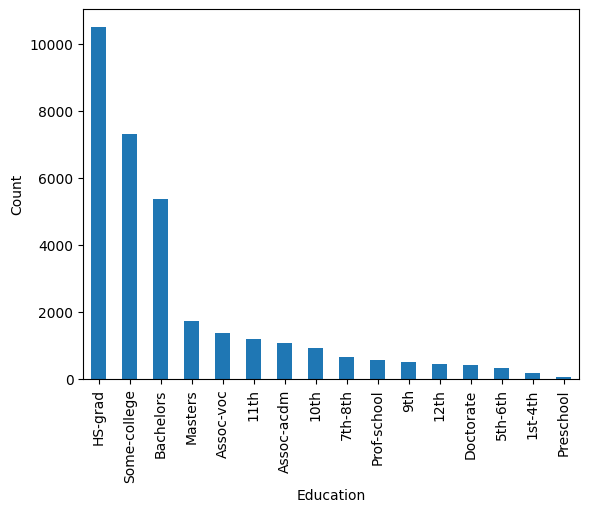

In [31]:
import matplotlib.pyplot as plt
df['education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [39]:
dm = df.groupby('income')[['age']].mean()
ds = df.groupby('income')[['age']].std()

d = pd.concat([dm,ds],axis=1)
d.columns = ['mean','std']
print(d)

             mean        std
income                      
<=50K   36.783738  14.020088
>50K    44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

Ответ:нет

In [41]:
high_income_education_counts = df[df['income'] == '>50K']['education'].value_counts()

print("Образование людей с доходом более 50 тыс. долларов в год:\n", high_income_education_counts)

Образование людей с доходом более 50 тыс. долларов в год:
 Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [56]:
high_income_male = df[(df['sex'] == 'Male') & (df['income'] == '>50K')]

high_income_male['is_married'] = high_income_male['marital.status'].str.startswith('Married')

married_ratio = high_income_male['is_married'].sum() / len(high_income_male)
single_ratio = (1 - married_ratio)

print(f"Доля зарабатывающих много среди женатых мужчин: {married_ratio:.2%}")
print(f"Доля зарабатывающих много среди холостых мужчин: {single_ratio:.2%}")

Доля зарабатывающих много среди женатых мужчин: 89.54%
Доля зарабатывающих много среди холостых мужчин: 10.46%


<ipython-input-56-d7412c994d82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_income_male['is_married'] = high_income_male['marital.status'].str.startswith('Married')


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [44]:
mean_hours_per_week = df.groupby(['native.country', 'income'])['hours.per.week'].mean()

print(mean_hours_per_week)

native.country  income
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                >50K      45.641026
China           <=50K     37.381818
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours.per.week, Length: 80, dtype: float64


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [37]:
filtered_df = df[(df['sex'] == 'Female') & (df['income'] == '>50K')]

average_salary = filtered_df.groupby('native.country').size() / df.groupby('native.country').size()

average_salary = average_salary.sort_values(ascending=False)

print(average_salary)

native.country
France                        0.103448
Scotland                      0.083333
Japan                         0.080645
Taiwan                        0.078431
Honduras                      0.076923
Hungary                       0.076923
Canada                        0.074380
Italy                         0.068493
England                       0.066667
China                         0.066667
Yugoslavia                    0.062500
Philippines                   0.060606
Thailand                      0.055556
Laos                          0.055556
Portugal                      0.054054
Germany                       0.051095
Hong                          0.050000
Iran                          0.046512
Ireland                       0.041667
South                         0.037500
United-States                 0.036750
Greece                        0.034483
Poland                        0.033333
Cuba                          0.031579
Nicaragua                     0.029412
Dominican-

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [48]:
import random

def calculate_magic_salary(row):
    if row['income'] == '<=50K':
        return random.randint(0, 50)
    else:
        return random.randint(51, 200)

df['magic_salary'] = df.apply(calculate_magic_salary, axis=1)

average_salary_education = df.groupby('education')['magic_salary'].mean()

print(average_salary_education)

education
10th             30.829582
11th             29.463830
12th             33.090069
1st-4th          29.863095
5th-6th          29.981982
7th-8th          31.224458
9th              30.990272
Assoc-acdm       49.089972
Assoc-voc        51.810420
Bachelors        67.161905
Doctorate        96.699758
HS-grad          41.249024
Masters          79.798607
Preschool        22.137255
Prof-school     101.737847
Some-college     43.565629
Name: magic_salary, dtype: float64
